## 3.1 Domain Specific Dataset Analysis

### Domain 1 - Technical Questions on Stackoverflow

#### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import PorterStemmer

#### Scraping of Questions was done using SCRAPY and saved into a csv

In [3]:
# import the dataset that we scraped using scrapy
df = pd.read_csv('domain1_data/domain1_dataset.csv', index_col = None)
df

,question,content
0,NaN,NaN
1,Does not have BatchGetImage permission - While...,I am Able to train my modelusing Sagemaker Ten...
2,"Can I connect Redis with MongoDb directly?,How...",I am a novice to using Redis. We use MongoDB i...
3,How to get measurements[].value from actuator/...,I'm using spring boot metrics and I need Value...
4,"Duplicated users in Azure AD,Add Office 365 us...",I've set up Azure AD Connect on my server and ...
...,...,...
97,How to connect Lumen framework with Kafka queu...,I have a project with Lumen framework. Needs t...
98,"Xamarin Shell FlyoutItem's tab click event,OnA...","Im using Xamarin forms, and on my AppShell, i ..."
99,Blazor server side: How to upload files in www...,Hi i want to upload files in wwwroot folder wh...
100,"Appending to list of lists in python,How do I ...","I have a list of lists like this:\n,a = [['a',..."


#### Clean the dataframe to get only 20 documents (20 questions with their content )

In [4]:
df = df.drop([0])
df = df.drop([19])
for i in range (21, 101):
    df = df.drop([i])
df

,question,content
1,Does not have BatchGetImage permission - While...,I am Able to train my modelusing Sagemaker Ten...
2,"Can I connect Redis with MongoDb directly?,How...",I am a novice to using Redis. We use MongoDB i...
3,How to get measurements[].value from actuator/...,I'm using spring boot metrics and I need Value...
4,"Duplicated users in Azure AD,Add Office 365 us...",I've set up Azure AD Connect on my server and ...
5,Any way to grab struct from DLL using dlsym (D...,I have been looking everywhere for this questi...
6,"Why i'm getting conflict?,What is causing ERRO...","I have a table (,test,) with following fields:..."
7,"PptxGenJS add chart show nothing,Line charts n...",I am working with an export function by using ...
8,"Python AWS Max retries Errno 111,How do I merg...",I have two servers (one flask and one grafana)...
9,Why am I receiving an error when trying to add...,"I'm getting an error for grid.add(button, c, r..."
10,How can I set custom template for item in list...,"What I want to achieve is something like:,But ..."


#### Combining the two columns for analysing

In [5]:
# rename and arrange index
df = df.rename(index = {20:'19'})
df = df.rename(index = {101:'20'})

# combine the content and the questions to perform analysis on the data
df["data"] = df["question"] + df["content"]
df = df.drop(['question', 'content'], axis=1)
df

,data
1,Does not have BatchGetImage permission - While...
2,"Can I connect Redis with MongoDb directly?,How..."
3,How to get measurements[].value from actuator/...
4,"Duplicated users in Azure AD,Add Office 365 us..."
5,Any way to grab struct from DLL using dlsym (D...
6,"Why i'm getting conflict?,What is causing ERRO..."
7,"PptxGenJS add chart show nothing,Line charts n..."
8,"Python AWS Max retries Errno 111,How do I merg..."
9,Why am I receiving an error when trying to add...
10,How can I set custom template for item in list...


#### Perform Tokenization using NLTK word_tokenize - splits strings into tokens (nominally words). It splits tokens based on white space and punctuation. 

In [6]:
# Each column in this dataframe is a document of the Domain. The domain here is, technical questions on stack overflow
# Word tokenization
df['tokens'] = df.apply(lambda row : word_tokenize(row['data']), axis = 1)
df

,data,tokens
1,Does not have BatchGetImage permission - While...,"[Does, not, have, BatchGetImage, permission, -..."
2,"Can I connect Redis with MongoDb directly?,How...","[Can, I, connect, Redis, with, MongoDb, direct..."
3,How to get measurements[].value from actuator/...,"[How, to, get, measurements, [, ], .value, fro..."
4,"Duplicated users in Azure AD,Add Office 365 us...","[Duplicated, users, in, Azure, AD, ,, Add, Off..."
5,Any way to grab struct from DLL using dlsym (D...,"[Any, way, to, grab, struct, from, DLL, using,..."
6,"Why i'm getting conflict?,What is causing ERRO...","[Why, i, 'm, getting, conflict, ?, ,, What, is..."
7,"PptxGenJS add chart show nothing,Line charts n...","[PptxGenJS, add, chart, show, nothing, ,, Line..."
8,"Python AWS Max retries Errno 111,How do I merg...","[Python, AWS, Max, retries, Errno, 111, ,, How..."
9,Why am I receiving an error when trying to add...,"[Why, am, I, receiving, an, error, when, tryin..."
10,How can I set custom template for item in list...,"[How, can, I, set, custom, template, for, item..."


In [7]:
#write back into csv for future reference
# df.to_csv('tokenized_data.csv', index=False)

#### The token distributions before stemming is shown below

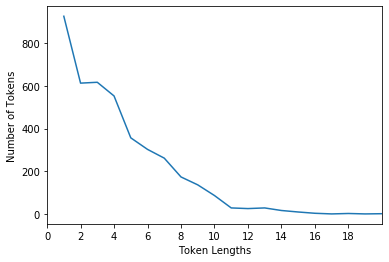

In [8]:
len_dict = {}
for index, row in df.iterrows():
    for token in row['tokens']:
        tlen = len(token)
        if tlen in len_dict.keys():
            len_dict[tlen]+=1
        else:
            len_dict[tlen]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Token Lengths')
plt.xlim(0,20)
plt.xticks(np.arange(0, 20, 2))
plt.ylabel('Number of Tokens')
plt.show()

#### Perform Stemming using PorterStemmer. The Porter stemming algorithm is a process for removing the commoner morphological and inflexional endings from words in English.

In [9]:
stemming = PorterStemmer()
stemmed = []
df['stemmed'] = ""
for index,row in df.iterrows(): 
    stem_each = []
    for token in row['tokens']:
        stem_each.append(stemming.stem(token))
        df['stemmed'][index] = stem_each
    stemmed.append(stem_each)

#### The token distribution after stemming is shown below

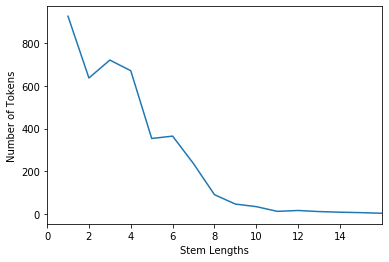

In [10]:
len_dict = {}
for index, row in df.iterrows():
    for token in row['stemmed']:
        tlen = len(token)
        if tlen in len_dict.keys():
            len_dict[tlen]+=1
        else:
            len_dict[tlen]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Stem Lengths')
plt.xlim(0,16)
plt.xticks(np.arange(0, 16, 2))
plt.ylabel('Number of Tokens')
plt.show()

In [11]:
# df.to_csv('stemmed_data.csv', index=False)

#### Dataframe after Tokenization, Stemming and Sentence Segmentation
#### Sentence segmentation is done using sent_tokenize from NLTK. The sent_tokenize function uses an instance of PunktSentenceTokenizer from the nltk. The punkt module, has already been trained and can mark the end and beginning of sentence at  characters and punctuation.

In [12]:
df['sentences'] = df.apply(lambda row : sent_tokenize(row['data']), axis = 1)
# df.to_csv('sentences.csv', index=False)
df

,data,tokens,stemmed,sentences
1,Does not have BatchGetImage permission - While...,"[Does, not, have, BatchGetImage, permission, -...","[doe, not, have, batchgetimag, permiss, -, whi...",[Does not have BatchGetImage permission - Whil...
2,"Can I connect Redis with MongoDb directly?,How...","[Can, I, connect, Redis, with, MongoDb, direct...","[can, I, connect, redi, with, mongodb, directl...","[Can I connect Redis with MongoDb directly?,Ho..."
3,How to get measurements[].value from actuator/...,"[How, to, get, measurements, [, ], .value, fro...","[how, to, get, measur, [, ], .valu, from, actu...",[How to get measurements[].value from actuator...
4,"Duplicated users in Azure AD,Add Office 365 us...","[Duplicated, users, in, Azure, AD, ,, Add, Off...","[duplic, user, in, azur, AD, ,, add, offic, 36...","[Duplicated users in Azure AD,Add Office 365 u..."
5,Any way to grab struct from DLL using dlsym (D...,"[Any, way, to, grab, struct, from, DLL, using,...","[ani, way, to, grab, struct, from, dll, use, d...",[Any way to grab struct from DLL using dlsym (...
6,"Why i'm getting conflict?,What is causing ERRO...","[Why, i, 'm, getting, conflict, ?, ,, What, is...","[whi, i, 'm, get, conflict, ?, ,, what, is, ca...","[Why i'm getting conflict?,What is causing ERR..."
7,"PptxGenJS add chart show nothing,Line charts n...","[PptxGenJS, add, chart, show, nothing, ,, Line...","[pptxgenj, add, chart, show, noth, ,, line, ch...","[PptxGenJS add chart show nothing,Line charts ..."
8,"Python AWS Max retries Errno 111,How do I merg...","[Python, AWS, Max, retries, Errno, 111, ,, How...","[python, aw, max, retri, errno, 111, ,, how, d...","[Python AWS Max retries Errno 111,How do I mer..."
9,Why am I receiving an error when trying to add...,"[Why, am, I, receiving, an, error, when, tryin...","[whi, am, I, receiv, an, error, when, tri, to,...",[Why am I receiving an error when trying to ad...
10,How can I set custom template for item in list...,"[How, can, I, set, custom, template, for, item...","[how, can, I, set, custom, templat, for, item,...",[How can I set custom template for item in lis...


#### Distribution of the sentence lengths across this domain is shown below

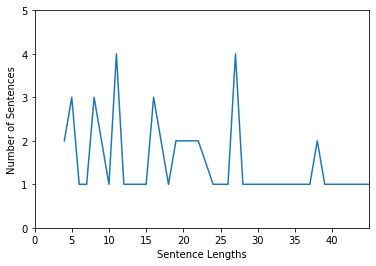

In [13]:
len_dict = {}
for index, row in df.iterrows():
    for sentence in row['sentences']:
        x = word_tokenize(sentence)
        len_this_sent = len(x)
        if len_this_sent in len_dict.keys():
            len_dict[len_this_sent]+=1
        else:
            len_dict[len_this_sent]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Sentence Lengths')
plt.xlim(0,45)
plt.xticks(np.arange(0, 45, 5))
plt.yticks(np.arange(0, 6, 1))
plt.ylabel('Number of Sentences')
plt.show()

#### Choose 3 sentences for POS tagging

In [14]:
sentences = ["How can I remove a specific item from an array", "Why do I get an UnsupportedOperationException when trying to remove an element from a List?,", "How to get the source directory of a Bash script from within the script itself, any idea how I can script this?" ]



#### Implement POS tagging using NLTK's pos_tag() function 

In [15]:
pos_result = []
for i in range(0,3):
    text = word_tokenize(sentences[i])
    pos_temp = nltk.pos_tag(text)
    pos_result.append(pos_temp)
pos_result

[[('How', 'WRB'),
  ('can', 'MD'),
  ('I', 'PRP'),
  ('remove', 'VB'),
  ('a', 'DT'),
  ('specific', 'JJ'),
  ('item', 'NN'),
  ('from', 'IN'),
  ('an', 'DT'),
  ('array', 'NN')],
 [('Why', 'WRB'),
  ('do', 'VBP'),
  ('I', 'PRP'),
  ('get', 'VB'),
  ('an', 'DT'),
  ('UnsupportedOperationException', 'NN'),
  ('when', 'WRB'),
  ('trying', 'VBG'),
  ('to', 'TO'),
  ('remove', 'VB'),
  ('an', 'DT'),
  ('element', 'NN'),
  ('from', 'IN'),
  ('a', 'DT'),
  ('List', 'NN'),
  ('?', '.'),
  (',', ',')],
 [('How', 'WRB'),
  ('to', 'TO'),
  ('get', 'VB'),
  ('the', 'DT'),
  ('source', 'NN'),
  ('directory', 'NN'),
  ('of', 'IN'),
  ('a', 'DT'),
  ('Bash', 'NNP'),
  ('script', 'NN'),
  ('from', 'IN'),
  ('within', 'IN'),
  ('the', 'DT'),
  ('script', 'NN'),
  ('itself', 'PRP'),
  (',', ','),
  ('any', 'DT'),
  ('idea', 'NN'),
  ('how', 'WRB'),
  ('I', 'PRP'),
  ('can', 'MD'),
  ('script', 'VB'),
  ('this', 'DT'),
  ('?', '.')]]